In [1]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, classification_report

In [2]:
df = pd.read_csv("C:\\Users\Kwame Kissi-Twum\\Desktop\\python\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#bcos glucose, bp, skinthickness, insulin & bmi cannot be 0
columns_to_impute =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for column in columns_to_impute:
    median = df[column].median()
    print (median)
    if df[column].values.all() ==0:
        df[column].replace(0, median, inplace=True)
df.describe()

117.0
72.0
23.0
30.5
32.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [9]:
for column in df:
    unique_vals = np.unique(df[column])
    lenval = len(unique_vals)
    if lenval > 15:
        print(f'the number of values for feature {column}: {unique_vals} --{lenval}')
    else:
        print(f"the number of values for feature {column}: {unique_vals}")

the number of values for feature Pregnancies: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17] --17
the number of values for feature Glucose: [ 44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188 189
 190 191 193 194 195 196 197 198 199] --135
the number of values for feature BloodPressure: [ 24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64  65
  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94  95
  96  98 100 102 104 106 108 110 114 122] --46
the number of values for feature SkinThickness: [ 7  8 10 

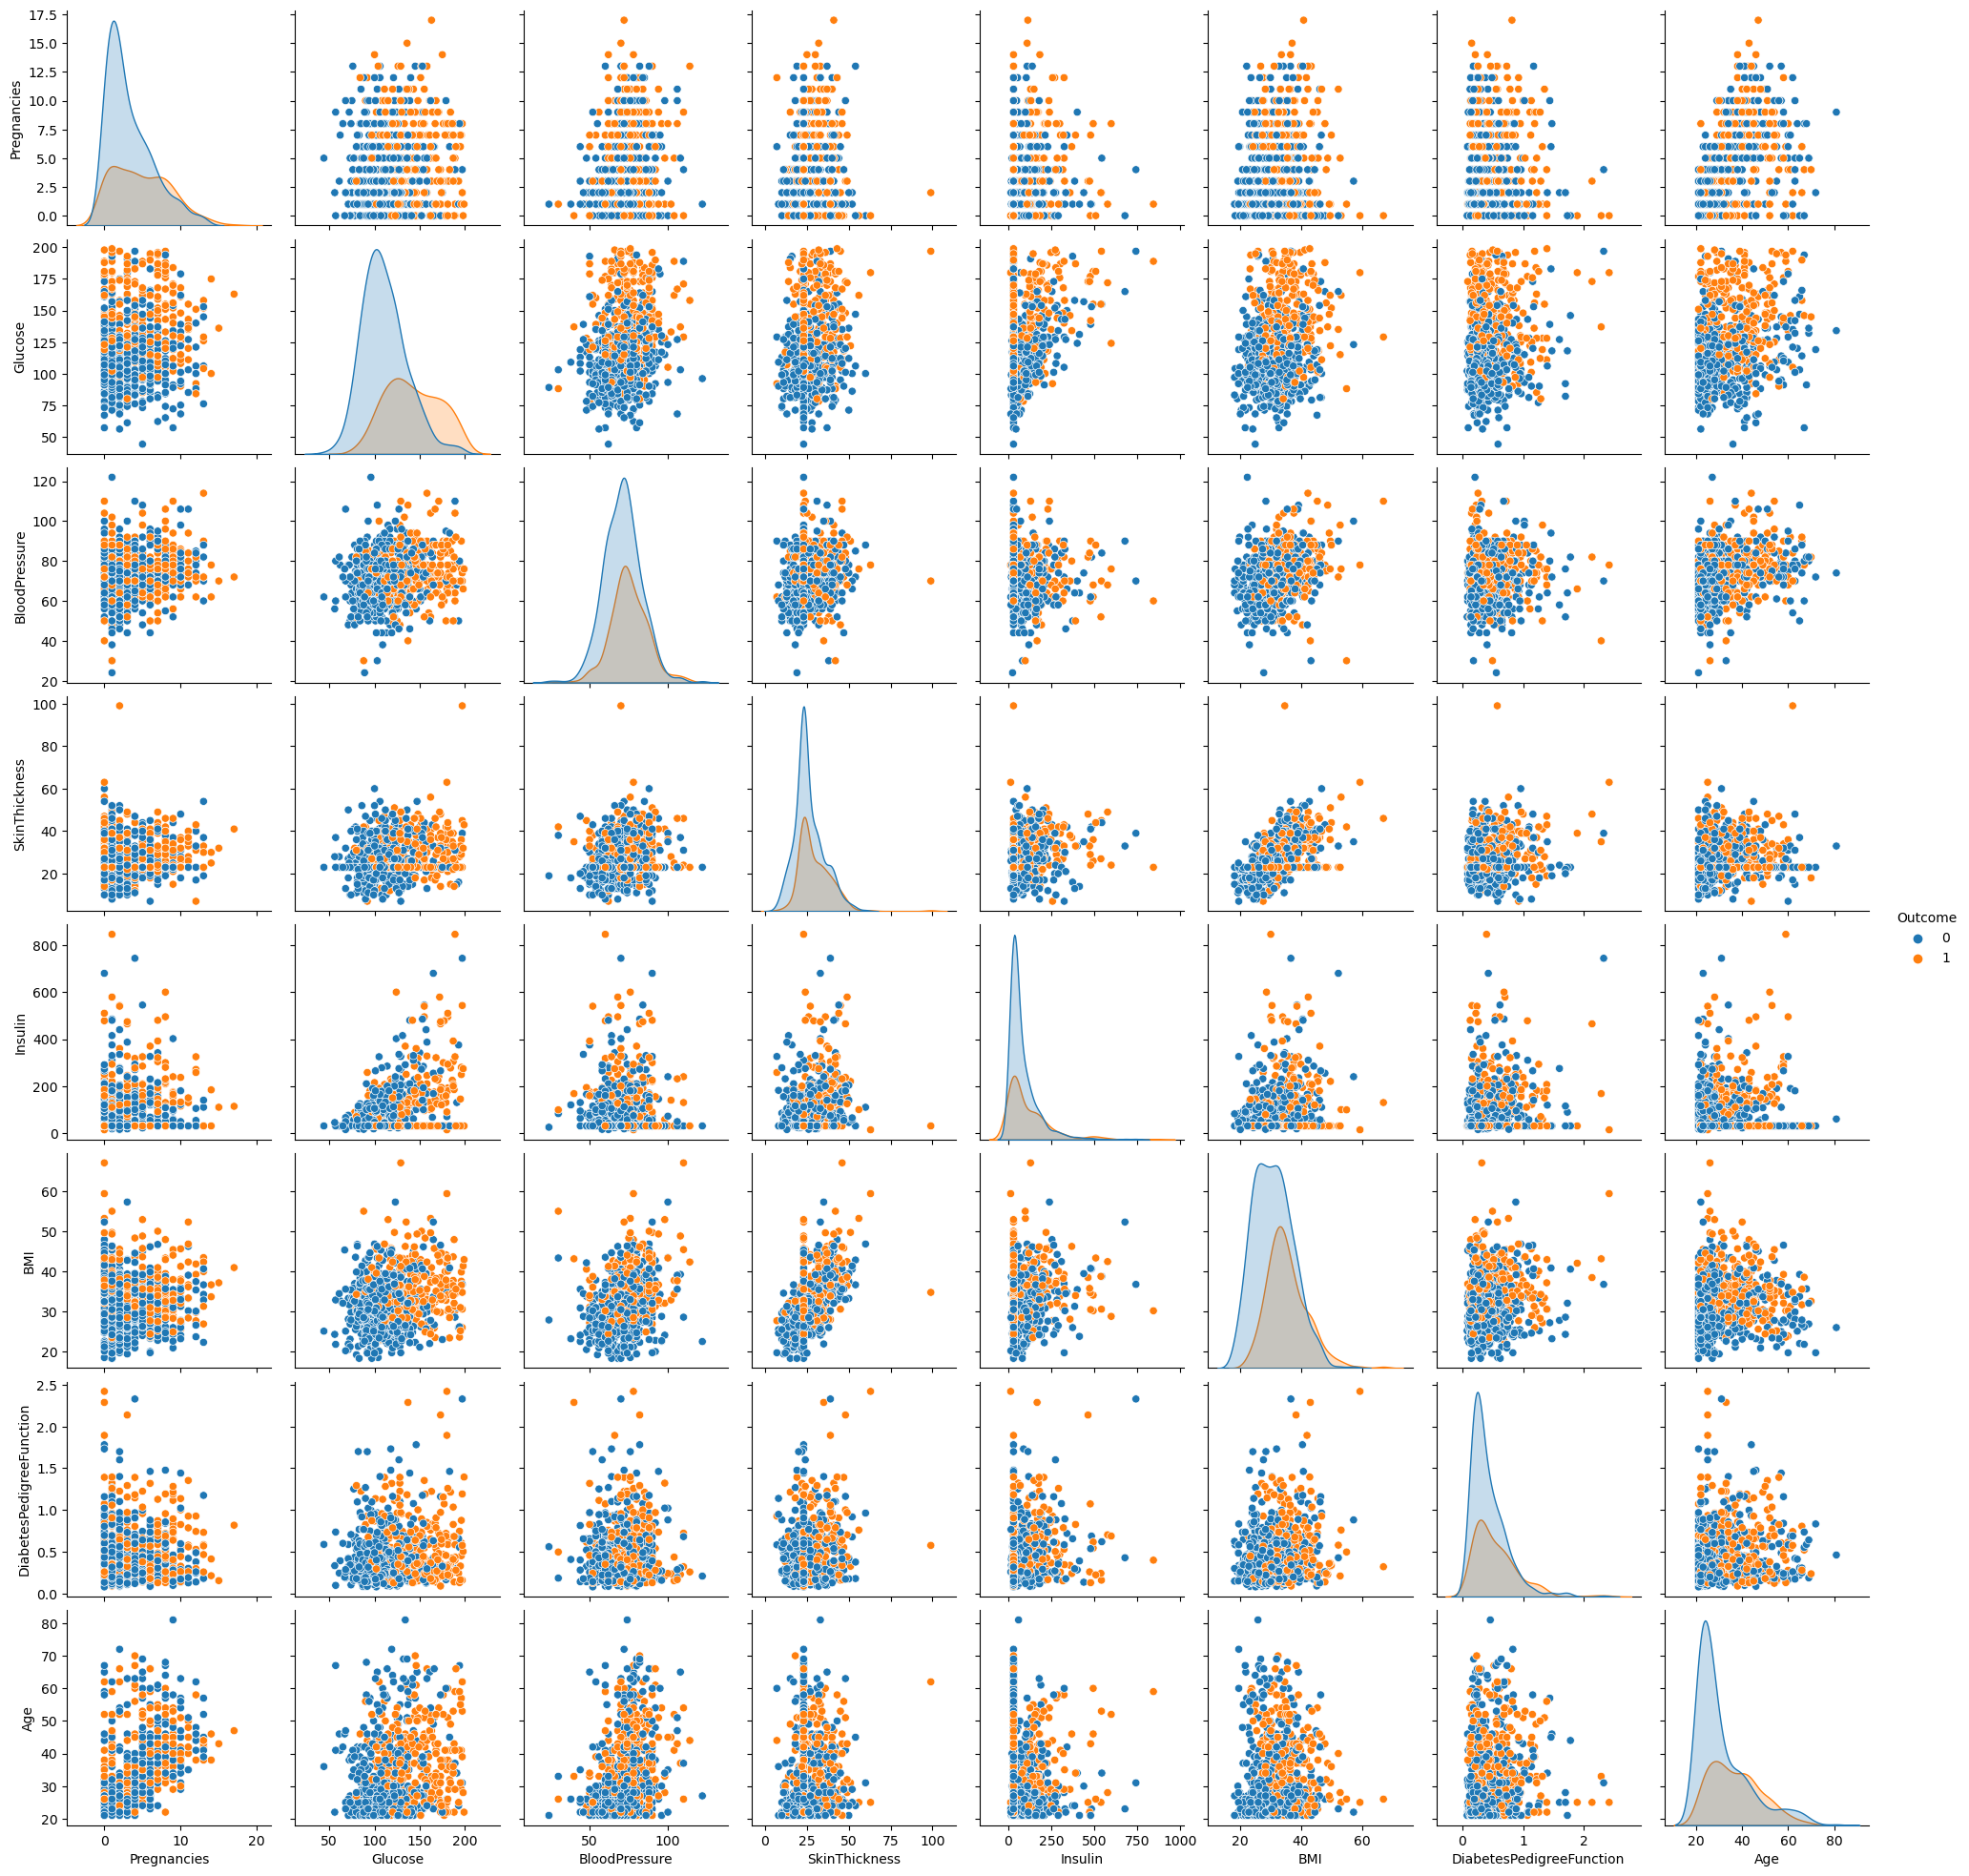

In [10]:
sns.pairplot(data=df, hue='Outcome')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


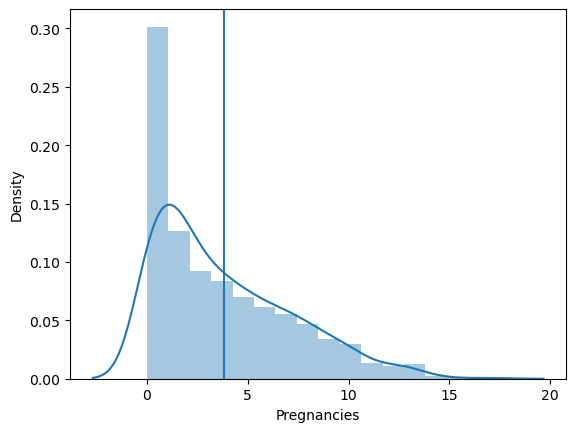

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


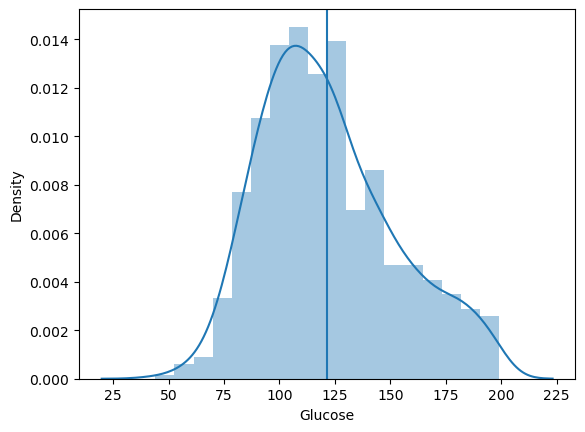

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


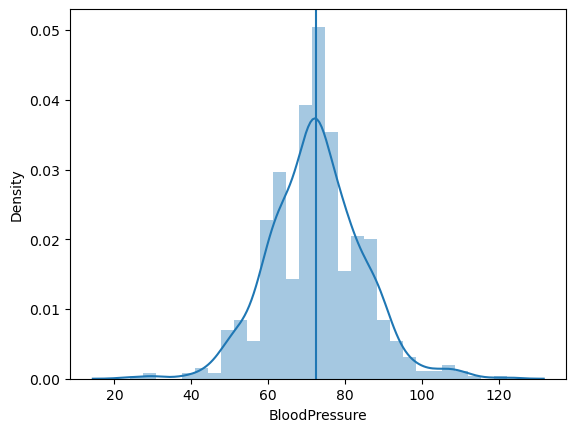

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


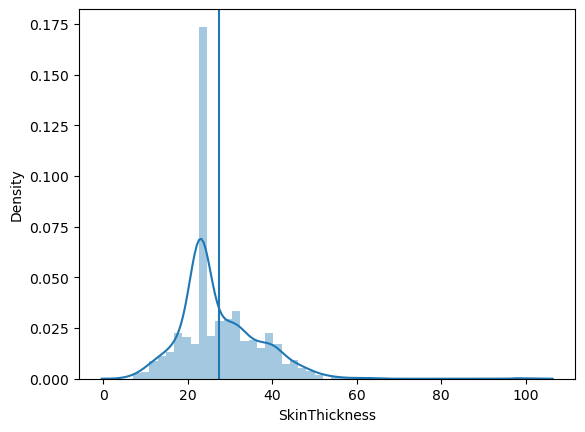

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


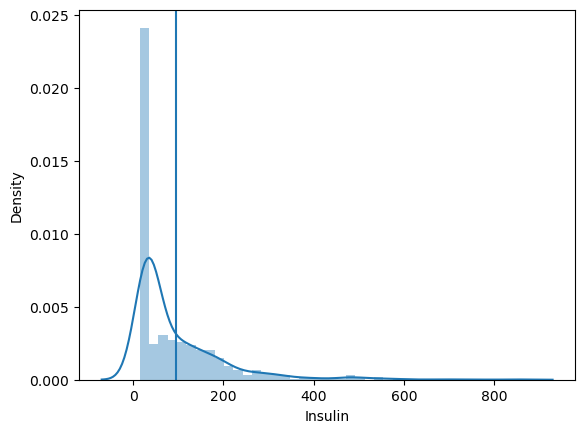

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


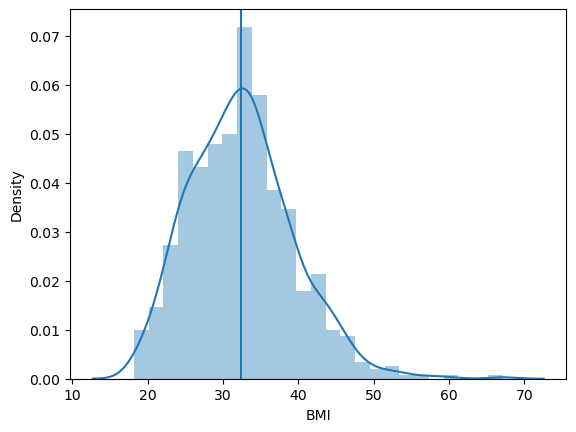

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


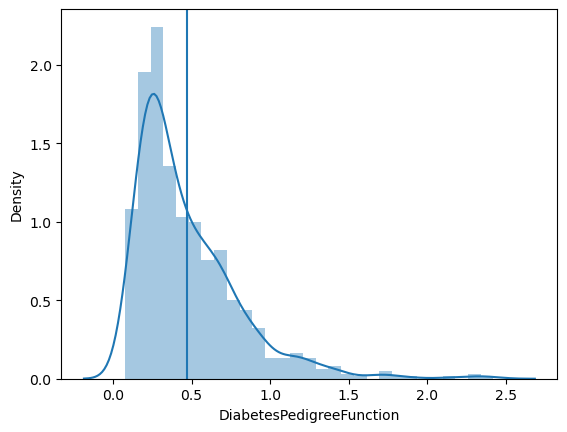

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


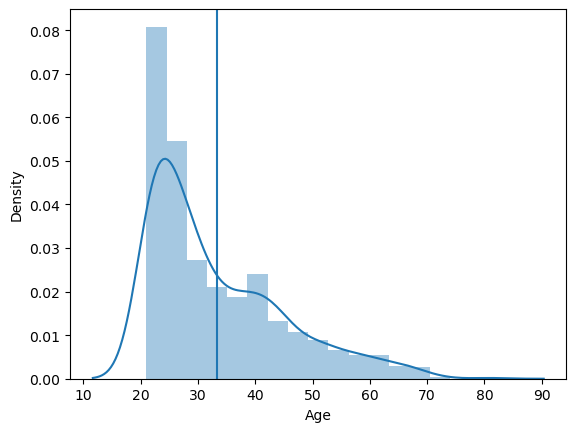

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


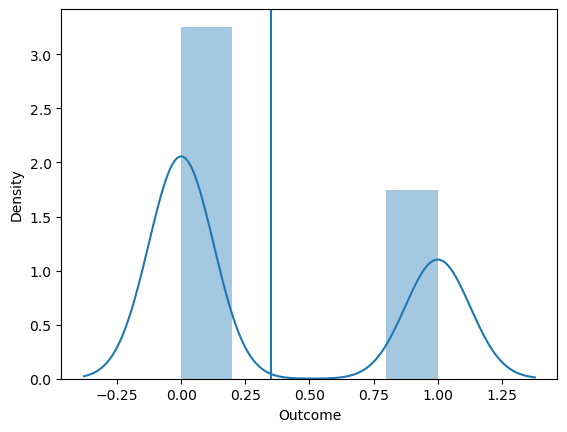

In [11]:
for column in df:
    sns.distplot(df[column])
    mean = df[column].mean()
    plt.axvline(mean)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


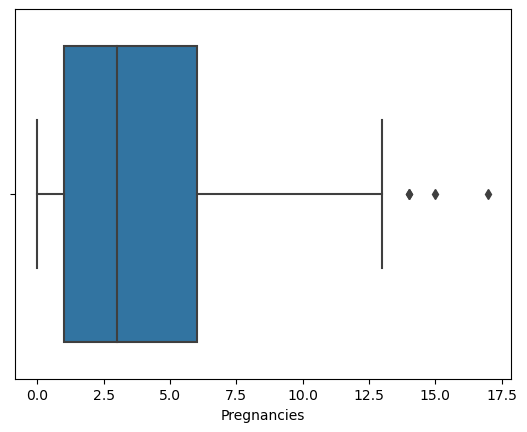

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


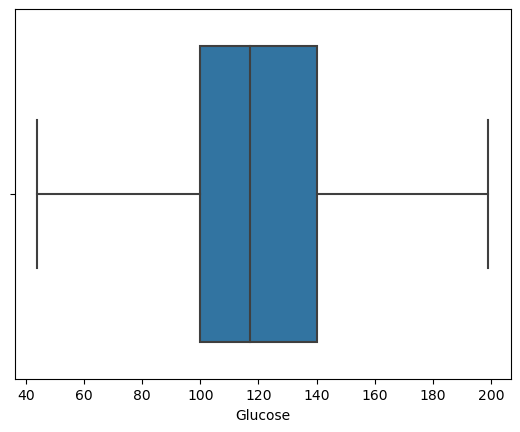

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


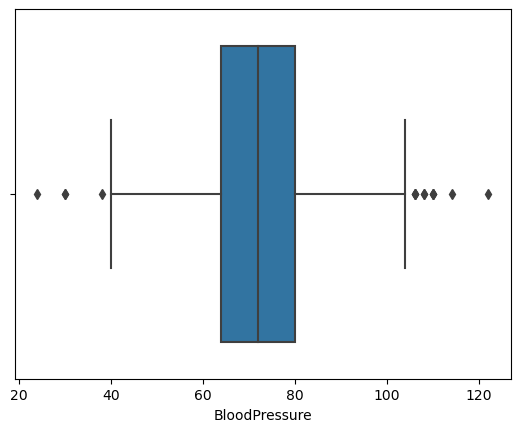

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


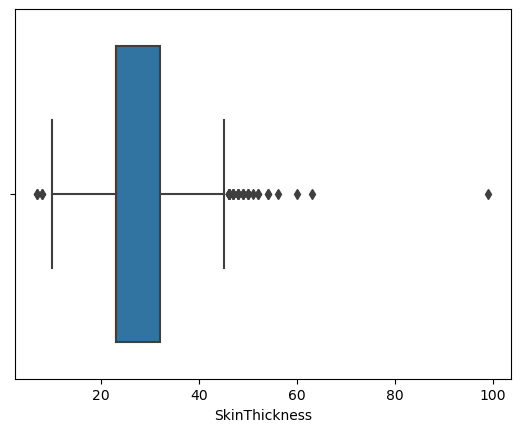

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


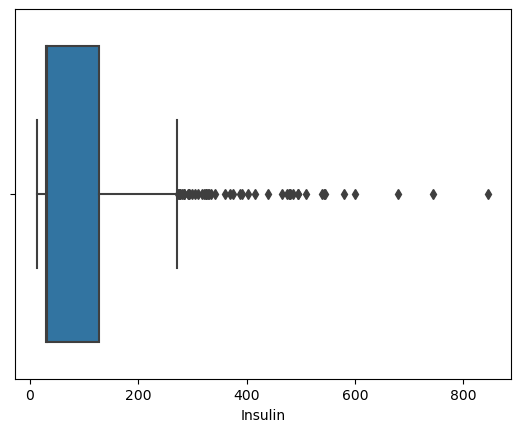

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


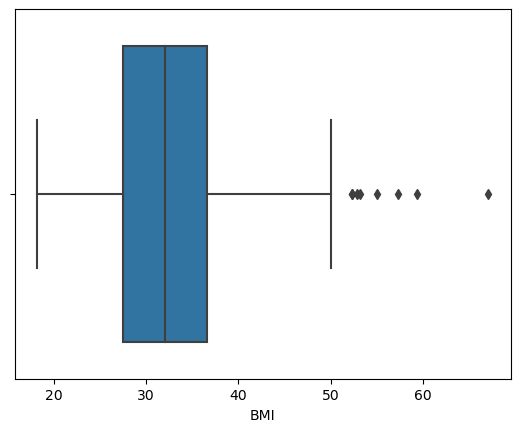

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


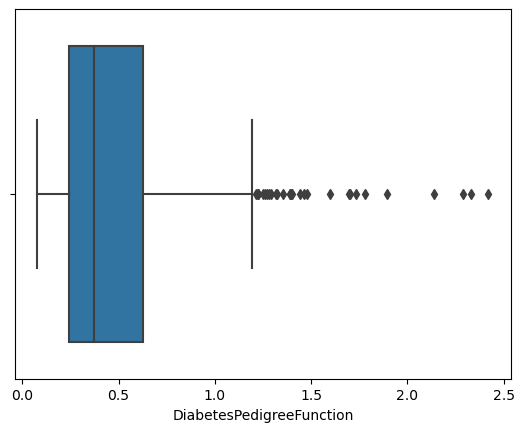

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


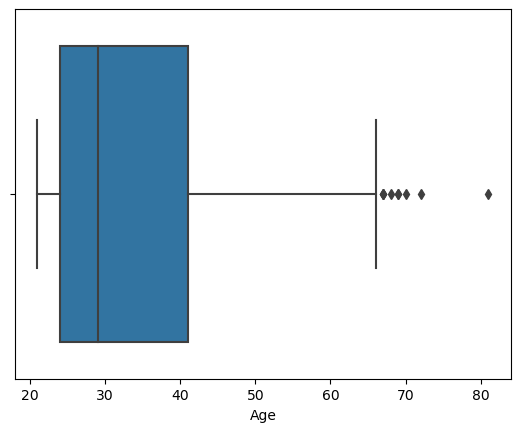

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


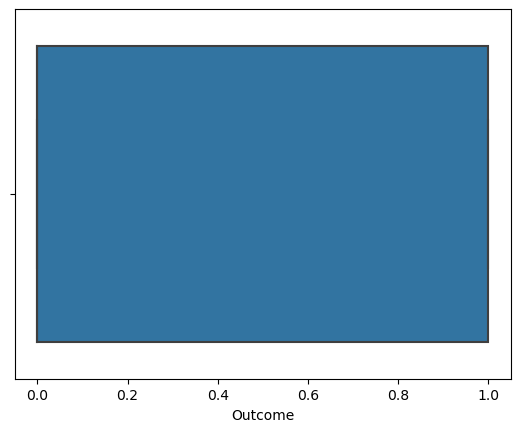

In [12]:
for column in df:
    sns.boxplot(df[column])
    plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231

<AxesSubplot:>

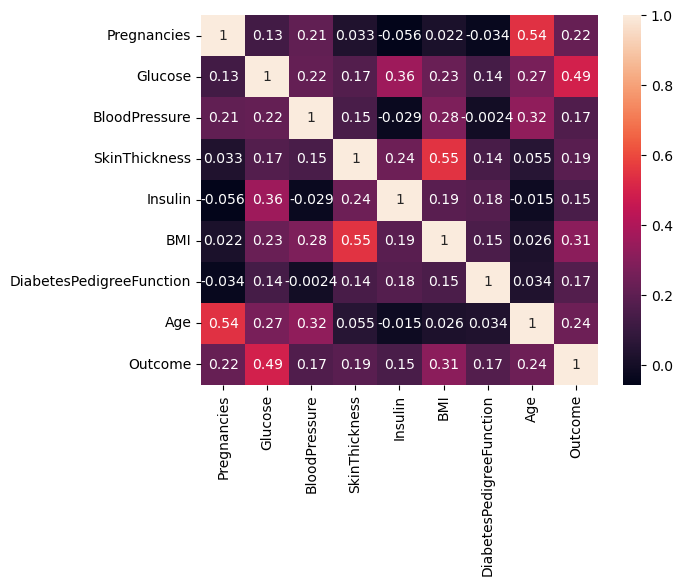

In [13]:
print(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
print(y)
X

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [17]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [18]:
#feature = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
importances = [f"the feature importance for {column} is: {model.feature_importances_[i]} " for i, column in enumerate(df.drop('Outcome', axis=1))]

for importance in importances:
    print (importance)

the feature importance for Pregnancies is: 0.08548895393318791 
the feature importance for Glucose is: 0.2929659721224084 
the feature importance for BloodPressure is: 0.14752040389770643 
the feature importance for SkinThickness is: 0.016507371213391665 
the feature importance for Insulin is: 0.05570417482644876 
the feature importance for BMI is: 0.18658940991398357 
the feature importance for DiabetesPedigreeFunction is: 0.10300333010020306 
the feature importance for Age is: 0.11222038399267026 


In [19]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
predictions = dt.predict(X_test)

In [21]:
score = accuracy_score(y_test, predictions) 
score

0.6552845528455284

In [22]:
relevances=[f'the feature importance for {column} is: {dt.feature_importances_[i]}' for i, column in enumerate(df.drop('Outcome', axis=1))]
for relevance in relevances:
     print (relevance)

the feature importance for Pregnancies is: 0.0676854913196949
the feature importance for Glucose is: 0.6744281796243758
the feature importance for BloodPressure is: 0.0
the feature importance for SkinThickness is: 0.0
the feature importance for Insulin is: 0.08738449597540969
the feature importance for BMI is: 0.0
the feature importance for DiabetesPedigreeFunction is: 0.17050183308051953
the feature importance for Age is: 0.0


[Text(0.4230769230769231, 0.875, 'Glucose <= 113.0\ngini = 0.474\nsamples = 153\nvalue = [94, 59]'),
 Text(0.15384615384615385, 0.625, 'Pregnancies <= 3.5\ngini = 0.195\nsamples = 73\nvalue = [65, 8]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.23076923076923078, 0.375, 'DiabetesPedigreeFunction <= 0.62\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.6923076923076923, 0.625, 'Glucose <= 138.0\ngini = 0.462\nsamples = 80\nvalue = [29, 51]'),
 Text(0.5384615384615384, 0.375, 'Insulin <= 197.0\ngini = 0.494\nsamples = 38\nvalue = [21, 17]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8461538461538461, 0.375, 'DiabetesPedigreeFunction <= 0.3\ngini = 0.308\ns

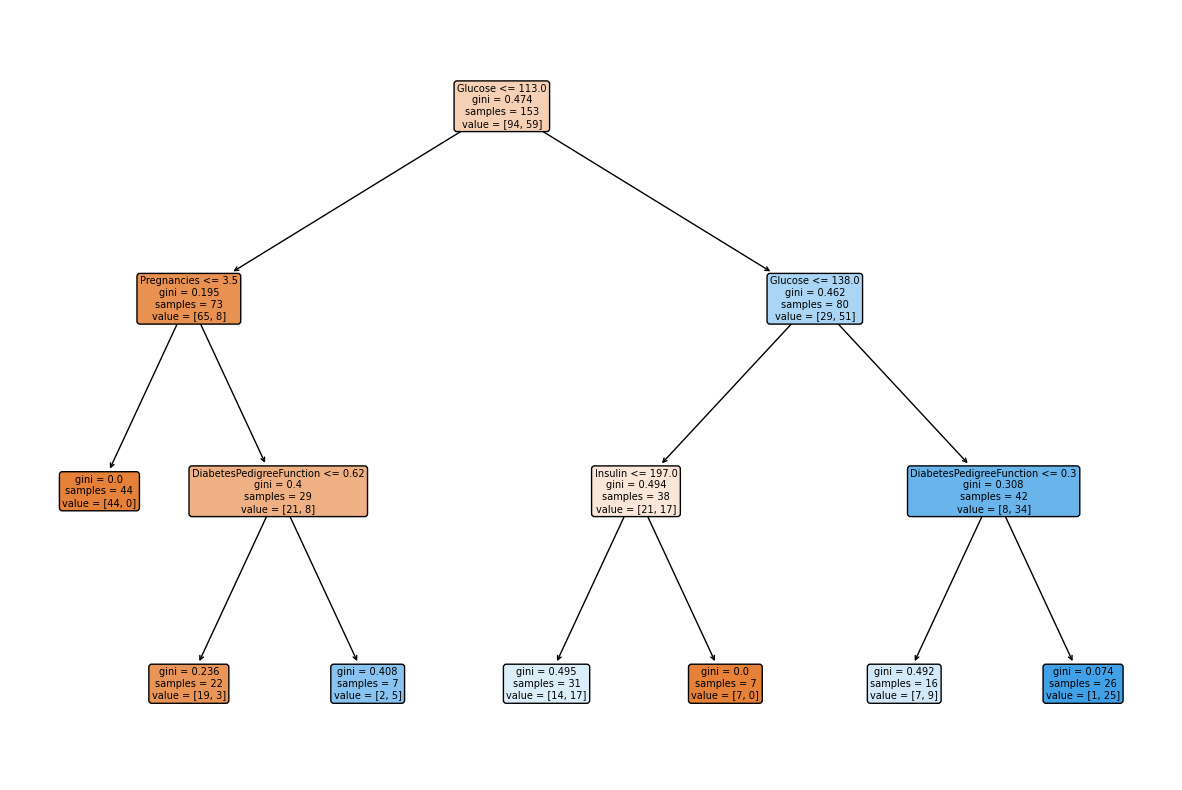

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True, rounded=True, feature_names=df.drop('Outcome', axis=1).columns)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       406
           1       0.50      0.81      0.61       209

    accuracy                           0.66       615
   macro avg       0.67      0.69      0.65       615
weighted avg       0.73      0.66      0.66       615



In [25]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    
    if classes is not None:
        sns.heatmap(cm, cmap="BuPu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
cm = confusion_matrix(y_test, predictions)
cm

array([[234, 172],
       [ 40, 169]], dtype=int64)

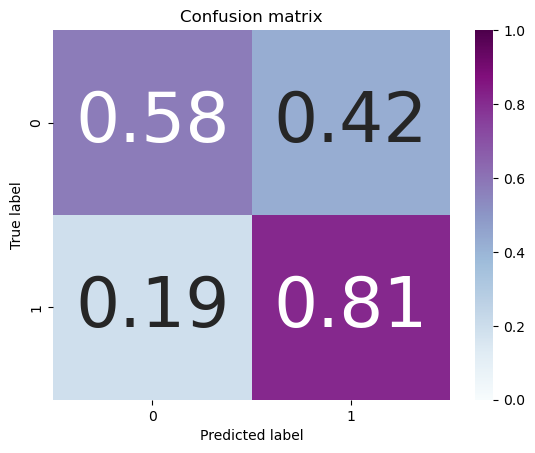

In [27]:
cm_perc = cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_perc, classes = dt.classes_, title='Confusion matrix')

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [29]:
rf_score = accuracy_score(y_test, rf_predictions)
rf_score

0.7414634146341463

In [30]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       406
           1       0.62      0.64      0.63       209

    accuracy                           0.74       615
   macro avg       0.71      0.72      0.71       615
weighted avg       0.74      0.74      0.74       615



In [31]:
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm

array([[323,  83],
       [ 76, 133]], dtype=int64)

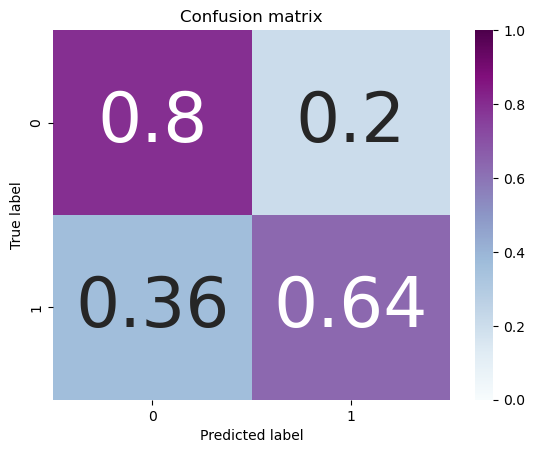

In [32]:
rfcm_perc = rf_cm/rf_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(rfcm_perc, title='Confusion matrix', classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth =None: 0.7365853658536585
Classification accuracy on test set with max features = 1 and max_depth =2: 0.7073170731707317
Classification accuracy on test set with max features = 1 and max_depth =3: 0.7300813008130081
Classification accuracy on test set with max features = 1 and max_depth =4: 0.7430894308943089
Classification accuracy on test set with max features = 1 and max_depth =5: 0.7268292682926829
Classification accuracy on test set with max features = sqrt and max_depth =None: 0.7495934959349594
Classification accuracy on test set with max features = sqrt and max_depth =2: 0.7479674796747967
Classification accuracy on test set with max features = sqrt and max_depth =3: 0.7544715447154472
Classification accuracy on test set with max features = sqrt and max_depth =4: 0.7528455284552845
Classification accuracy on test set with max features = sqrt and max_depth =5: 0.7495934959349594
Classification accuracy on te

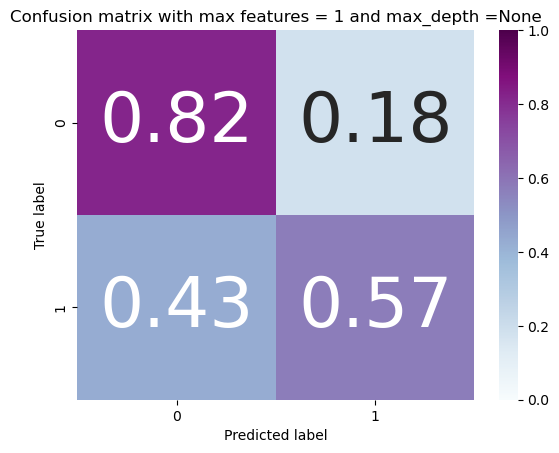

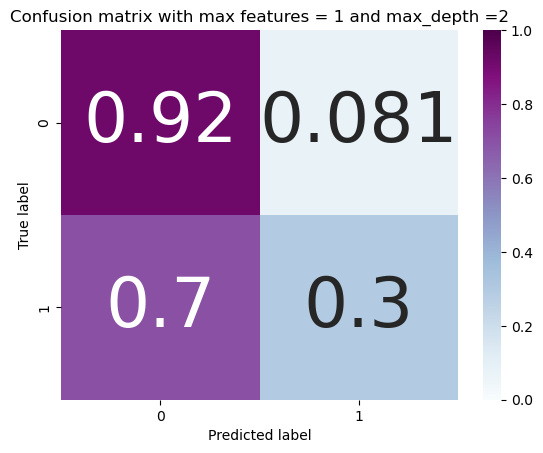

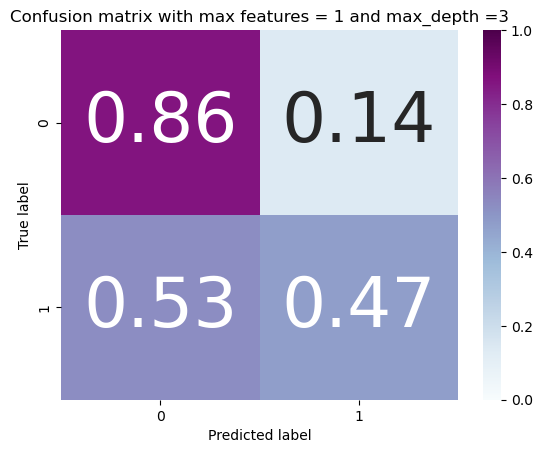

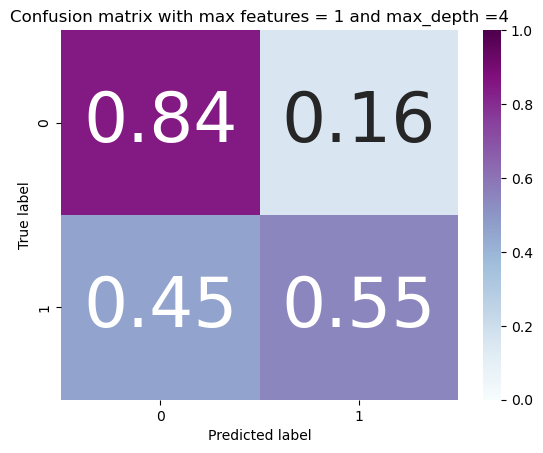

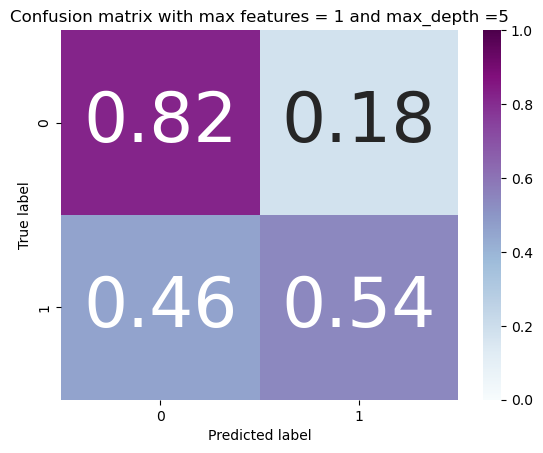

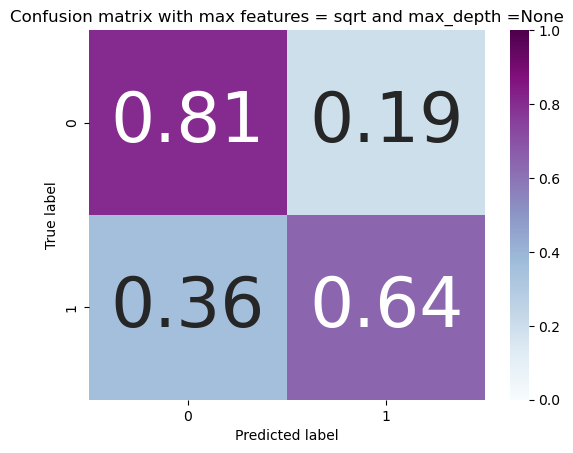

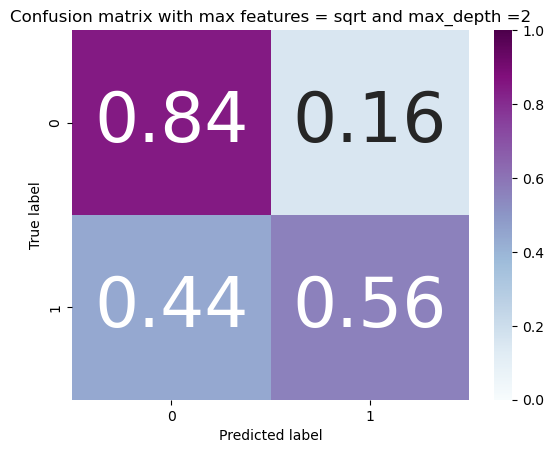

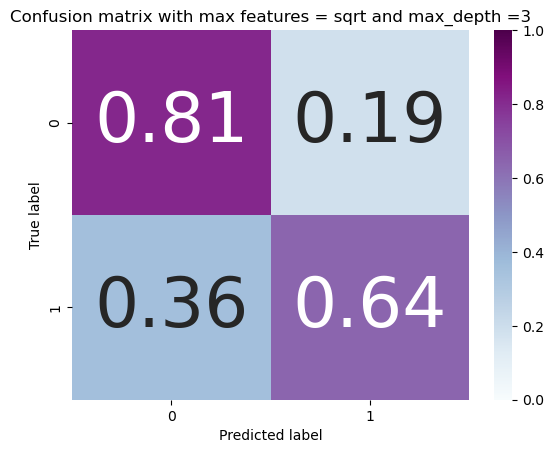

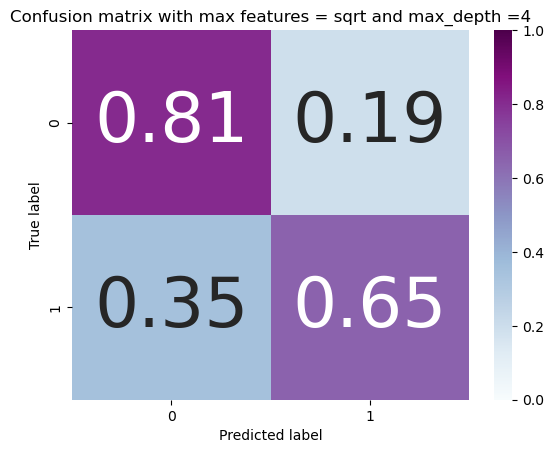

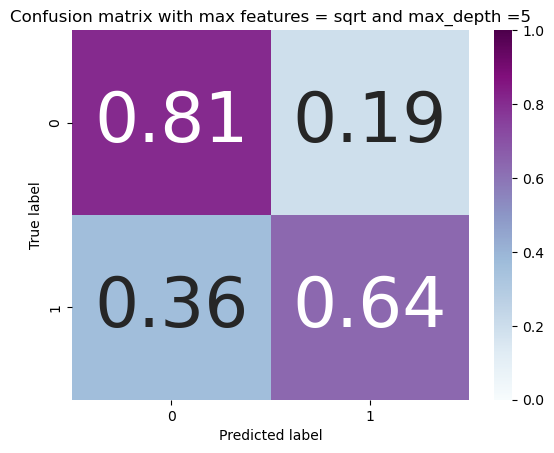

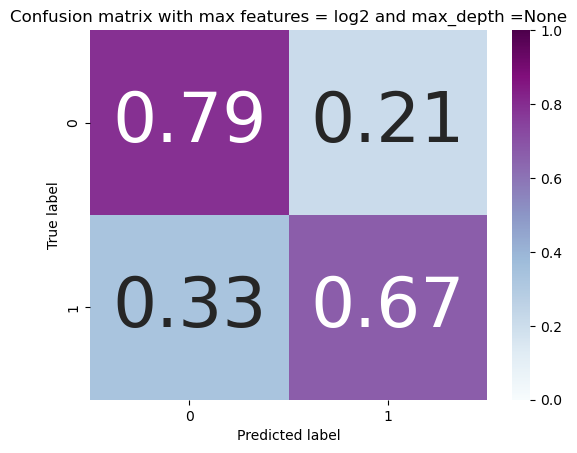

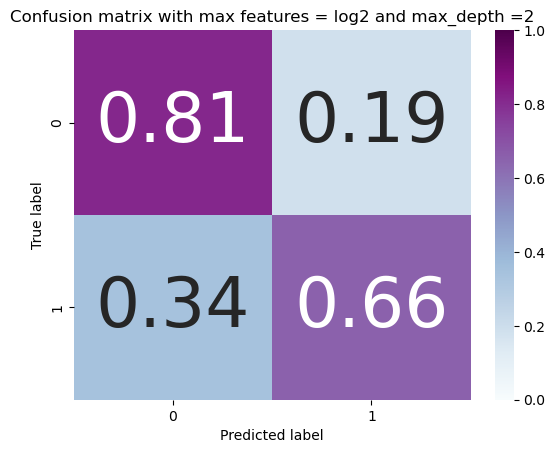

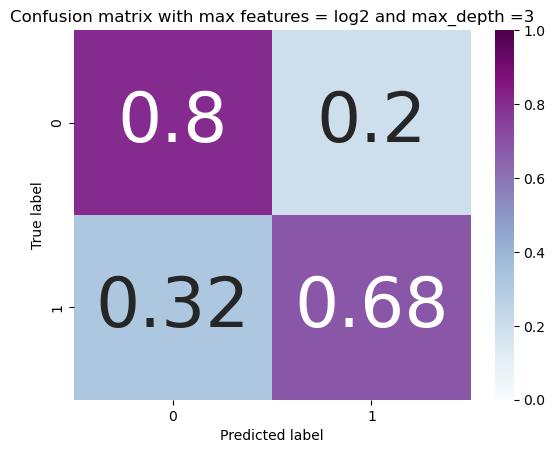

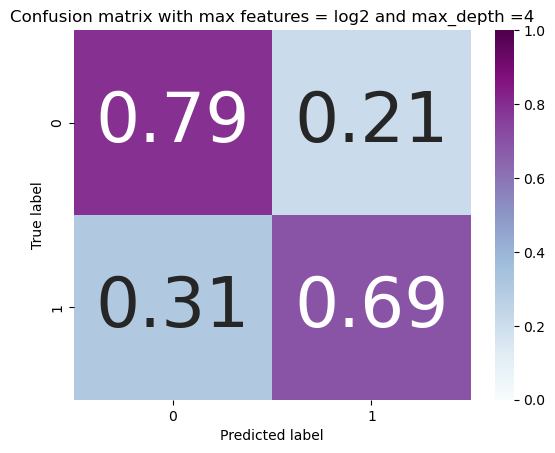

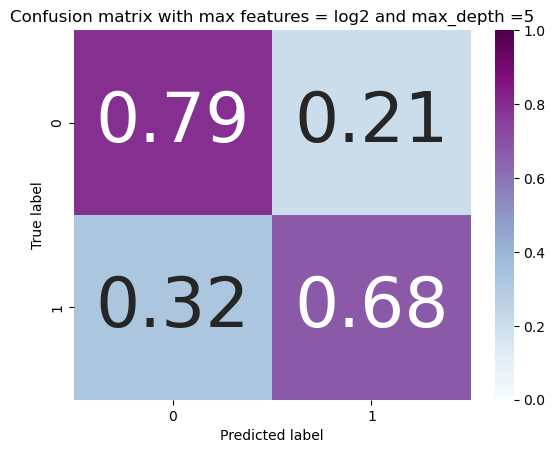

In [33]:
import itertools
from itertools import product

n_estimators = 150
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths):
    rfc = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_features=f, max_depth=d, n_jobs=2,
                                random_state=1337)
    rfc.fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    
    print(f'Classification accuracy on test set with max features = {f} and max_depth ={d}:', accuracy_score(y_test,rfc_predictions))
    cm = confusion_matrix(y_test, rfc_predictions)
    rfc_cm_perc = cm/cm.sum(axis=1).reshape(-1,1)
    plt.figure()
    plot_confusion_matrix(rfc_cm_perc, title=f'Confusion matrix with max features = {f} and max_depth ={d}', classes=rfc.classes_)
    

In [34]:
final_model = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features='log2' , max_depth=3, n_jobs=2,
                                random_state=1337)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)
score = accuracy_score(y_test, final_predictions) 
print(score)
print(classification_report(y_test, final_predictions))

0.7626016260162601
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       406
           1       0.64      0.68      0.66       209

    accuracy                           0.76       615
   macro avg       0.74      0.74      0.74       615
weighted avg       0.77      0.76      0.76       615

